# Task: Data Extraction, Selection and Transformation

In [45]:
import os
import requests
import zipfile as zf
import shutil

for i in range(1975, 2021, 5):
    zip_file_url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{i}/National/FARS{i}NationalCSV.zip"
    output = f'{i}_data.zip'
    
    r = requests.get(zip_file_url)
    with open(output, 'wb') as f:
        f.write(r.content)
        
    with zf.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall(f"{i}")
        
os.mkdir("accident_all_years")
for i in range(1975, 2021, 5):
    shutil.copy2(f"{i}/accident.csv", f"accident_all_years/{i}_accident.csv")

# Manipulate and analyze the data from NHTSA

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
df= pd.DataFrame()
accidents, people, deaths, midnight, snowy= 0, 0, 0, 0, 0
deaths_list= []

for i in range(1975, 2021, 5):
    temp_df= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding= 'ISO-8859-1')
    df= pd.concat([df, temp_df]).reset_index(drop=True)
    accidents += temp_df.shape[0]
    people += sum(temp_df.PERSONS)
    deaths += sum(temp_df.FATALS)
    for hr in [21, 22, 23, 24, 0, 1, 2, 3]:
        midnight += temp_df[temp_df.HOUR == hr].shape[0]
    snowy += temp_df[temp_df.WEATHER == 4].shape[0]
    s= sum(temp_df.FATALS)
    deaths_list.append(s)

Total number of Fatal accidents from 1975 to 2020:  376096
Total People involved: 955696 
Total People died: 418619
Proportion of accidents occurred between 9pm and 4am: 32.81 %
Proportion of accidents occurred in Snowy weather: 1.63 %


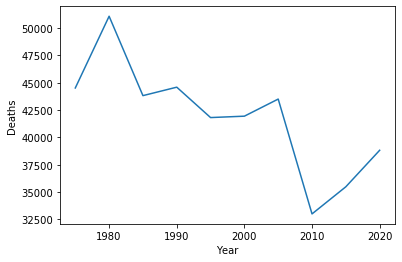

In [49]:
print("Total number of Fatal accidents from 1975 to 2020: ", accidents)
print("Total People involved:", people, "\nTotal People died:", deaths)
print("Proportion of accidents occurred between 9pm and 4am:", round((midnight / accidents)*100, 2), "%")
print("Proportion of accidents occurred in Snowy weather:", round((snowy / accidents)*100, 2), "%")
plt.plot(range(1975, 2021, 5), deaths_list)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.show()

**From the graph above, we can observe that, with the increase in the year, the deaths have been decreasing.**

---

In [52]:
import collections as c

In [51]:
print("The mean rate of Fatal accidents: ", df.FATALS.mean())

The mean rate of Fatal accidents:  1.1130642176465584


In [61]:
temp_df = pd.read_csv(f"accident_all_years/1975_accident.csv", encoding= 'ISO-8859-1')
unique_states = list(temp_df.STATE.unique())
deaths = {}
for i in list(unique_states):
    deaths[i]= temp_df[temp_df.STATE==i].FATALS.sum()
deaths = {k: v for k, v in sorted(deaths.items(), key=lambda item: item[1])}
dead_keys = list(deaths.keys())

print("In 1975, the 5 states which had the highest rate of fatal accidents:", dead_keys[-5:])
print("And the 5 states which had the lowest rate of fatal accidents:", dead_keys[:5])

In 1975, the 5 states which had the highest rate of fatal accidents: [17, 42, 36, 48, 6]
And the 5 states which had the lowest rate of fatal accidents: [11, 44, 2, 10, 50]


In [62]:
temp_df= pd.read_csv(f"accident_all_years/1990_accident.csv", encoding = 'ISO-8859-1')
unique_states = list(temp_df.STATE.unique())
deaths = {}
for i in list(unique_states):
    deaths[i] = temp_df[temp_df.STATE==i].FATALS.sum()
deaths = {k: v for k, v in sorted(deaths.items(), key=lambda item: item[1])}
dead_keys = list(od.keys())

print("In 1990, the 5 states which had the highest rate of fatal accidents:", od_keys[-5:])
print("And the 5 states which had the lowest rate of fatal accidents:" ,od_keys[:5])

In 1990, the 5 states which had the highest rate of fatal accidents: [42, 36, 12, 48, 6]
And the 5 states which had the lowest rate of fatal accidents: [11, 44, 2, 50, 38]


In [63]:
temp_df= pd.read_csv(f"accident_all_years/2020_accident.csv", encoding= 'ISO-8859-1')
print("The mean rate in 2020:", temp_df.FATALS.mean())

The mean rate in 2020: 1.0855001957166024


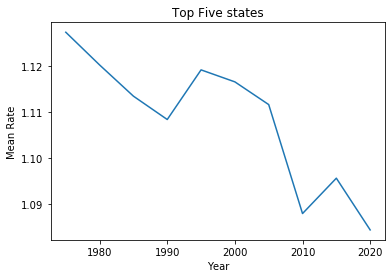

In [73]:
# for top five
meanRates= []
for i in range(1975, 2021, 5):
    temp_df= pd.DataFrame()
    temp_df2= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    unique_states= list(temp_df2.STATE.unique())
    deaths= {}
    for j in list(unique_states):
        deaths[i]= temp_df2[temp_df2.STATE==j].FATALS.sum()
    deaths= {k: v for k, v in sorted(deaths.items(), key= lambda item: item[1])}
    dead_keys = list(od.keys())
    top_five = dead_keys[-5:]
    bottom_five = dead_keys[:5]
    for k in top_five:
        temp_df= pd.concat([temp_df, temp_df2[temp_df2.STATE==k]])
    meanRates.append(temp_df.FATALS.mean())
    
plt.plot(range(1975, 2021, 5), meanRates)
plt.xlabel("Year")
plt.ylabel("Mean Rate")
plt.title("Top Five states")
plt.show()

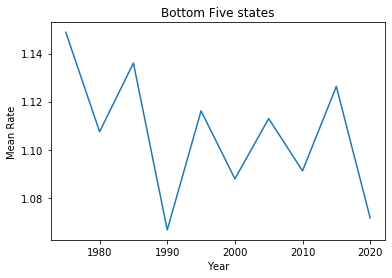

In [74]:
# for bottom five
meanRates= []
for i in range(1975, 2021, 5):
    temp_df= pd.DataFrame()
    temp_df2= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    unique_states= list(temp_df2.STATE.unique())
    deaths= {}
    for j in list(unique_states):
        deaths[i]= df[df.STATE==j].FATALS.sum()
    deaths= {k: v for k, v in sorted(deaths.items(), key= lambda item: item[1])}
    dead_keys = list(od.keys())
    bottom_five = dead_keys[:5]
    for k in bottom_five:
        temp_df= pd.concat([temp_df, temp_df2[temp_df2.STATE==k]])
    meanRates.append(temp_df.FATALS.mean())
    
plt.plot(range(1975, 2021, 5), meanRates)
plt.xlabel("Year")
plt.ylabel("Mean Rate")
plt.title("Bottom Five states")
plt.show()

**I think the in the top 5 states, the mean rate is decreasing with the increase in the year. But, in the bottom 5 states, the mean rate is fluctuating.**

---

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [75]:
columns= ["STATE", 'MONTH', 'DAY', 'YEAR', 'HOUR', 'PERSONS', 'MAN_COLL',
          'LGT_COND', 'WEATHER', 'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR']
temp_df= df.loc[:, columns]
temp_df= temp_df.sample(n=5000)
temp_df.dropna(inplace=True)

In [76]:
temp_df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
44183,6,8,14,80,6,2,4,1,1,0.0,1,5,0
128670,6,8,5,90,5,1,0,3,1,0.0,1,1,0
96822,17,7,4,85,20,3,2,1,1,0.0,1,5,1
371723,48,7,27,2020,17,2,6,1,1,0.0,1,2,1
162814,55,4,11,90,12,2,2,1,1,0.0,2,4,1


In [79]:
scaler= MinMaxScaler()
scaled_data= scaler.fit_transform(temp_df.to_numpy())
columns= list(temp_df.columns)
temp_df= pd.DataFrame(scaled_data, columns= columns)

In [80]:
temp_df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
0,0.090909,0.636364,0.132653,0.000000,0.060606,0.08,0.040404,0.00,0.0,0.0,0.0,0.500,0.00
1,0.090909,0.636364,0.040816,0.005155,0.050505,0.04,0.000000,0.25,0.0,0.0,0.0,0.000,0.00
2,0.290909,0.545455,0.030612,0.002577,0.202020,0.12,0.020202,0.00,0.0,0.0,0.0,0.500,0.25
3,0.854545,0.545455,0.265306,1.000000,0.171717,0.08,0.060606,0.00,0.0,0.0,0.0,0.125,0.25
4,0.981818,0.272727,0.102041,0.005155,0.121212,0.08,0.020202,0.00,0.0,0.0,0.2,0.375,0.25


In [115]:
nn = NearestNeighbors(n_neighbors=20).fit(temp_df[['WEATHER', 'FATALS']])
distances, indices = nn.kneighbors(temp_df[['WEATHER', 'FATALS']])

In [116]:
print(distances)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [117]:
random_2_rows= temp_df.sample(2)

---

In [118]:
from sklearn.decomposition import PCA

Variance: 42.88591258651567


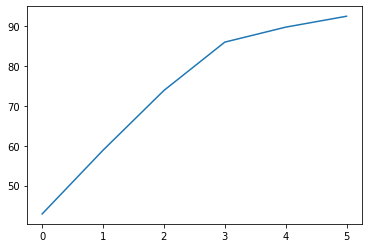

In [121]:
pca= PCA(n_components= 0.90)
pca.fit_transform(temp_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
print("Variance:", np.cumsum(pca.explained_variance_ratio_*100)[0])